This notebook clusters each quarter using 10 randomly generated 1k sample subsets. The score is the average of the 1st nearest neighbor to the 4th nearest neighbor of the sample. This is roughly the same as the average of the scores for the neighbors $\frac{N}{1000}$ to $4*\frac{N}{1000}$, where $N$ is the size of the quarter. The median scores for each point are recorded as final score for each point.

Scores are scaled such that the reference sinusoid features, having amplitude 0.5 (dF/F) and a period of 1 day, has a score of 1.

In [1]:
# Some standard imports for math and data handling
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pickle

# Imports for processing specific to this workbook
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from datetime import datetime

# Import the custom code developed for this work
sys.path.append('python')
from clusterOutliers import clusterOutliers as coo
import quarterTools as qt
%matplotlib inline

In [2]:
path_to_output = '/Users/Dan/Documents/KeplerLCs/output/'

In [3]:
Q_dict = dict()
for i in range(1,18):
    with open(path_to_output+'Q{}_ref.coo'.format(i),'rb') as file:
        Q_dict['Q{}'.format(i)]=pickle.load(file)

In [12]:
scores_dict = dict()
for smethod in Q_dict['Q1'].scores.columns:
    df = pd.DataFrame({'KIC':[]})
    for Q in Q_dict.keys():
        inds = [int(i[4:13]) for i in Q_dict[Q].scores[smethod].index[:-1]]
        df2 = pd.DataFrame({'KIC':inds,Q:Q_dict[Q].scores[smethod].values[:-1]})
        df = pd.merge(df,df2,how='outer').sort_values(by='KIC')
    scores_dict[smethod] = df

In [14]:
for smethod in scores_dict.keys():
    scores_dict[smethod].to_pickle('./scores/'+smethod+'ref')

In [9]:
# Reductions and previous scores need to be removed for rescoring
for Q in Q_dict.keys():
    Q_dict[Q].reductions={}
    Q_dict[Q].scores={}

In [16]:
# Saving copies to new files
# Commented out to avoid accidental overwrite
"""
for Q in Q_dict.keys():
    Q_dict[Q].save(of='/home/dgiles/Documents/KeplerLCs/output/{}_ref.coo'.format(Q))
"""

In [21]:
# The sinusoid should really be reproduced and features recalculated to match the duration 
# of the quarter in question, or else the features altered to take into account differences
# in lightcuve size and duration... For now, however, the gain is estimated to be minimal for
# the very similar Kepler quarters.
with open('sinusoid_feats.npy','rb') as file:
    sinusoid_feats = pickle.load(file)

sinusoid_feats_df = pd.DataFrame(index=['sinusoid'],columns=Q_dict['Q1'].data.columns,data=[sinusoid_feats])

for Q in Q_dict.keys():
    Q_dict[Q].data=Q_dict[Q].data.append(sinusoid_feats_df)

In [28]:
for Q in Q_dict.keys():
    print("Starting {}.".format(Q))
    pca90 = Q_dict[Q].pca_red(df='self',red_name='PCA90',var_rat=0.9,scaled=False,verbose=True)
    pca95 = Q_dict[Q].pca_red(df='self',red_name='PCA95',var_rat=0.95,scaled=False,verbose=True)
    pca99 = Q_dict[Q].pca_red(df='self',red_name='PCA99',var_rat=0.99,scaled=False,verbose=True)

Starting Q1.
Scaling data using StandardScaler...
Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 19,
        Variance explained: 90.5%
        
Scaling data using StandardScaler...
Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 25,
        Variance explained: 95.3%
        
Scaling data using StandardScaler...
Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 36,
        Variance explained: 99.0%
        
Starting Q2.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 18,
        Variance explained: 90.2%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 24,
        Variance explained: 95.3%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 37,
        Variance explained: 99.1%
        
Starting Q3.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 17,
        Variance explained: 90.6%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 22,
        Variance explained: 95.2%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 33,
        Variance explained: 99.0%
        
Starting Q4.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 18,
        Variance explained: 90.4%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 24,
        Variance explained: 95.6%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 36,
        Variance explained: 99.2%
        
Starting Q5.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 17,
        Variance explained: 90.0%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 23,
        Variance explained: 95.2%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 35,
        Variance explained: 99.1%
        
Starting Q6.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 15,
        Variance explained: 90.5%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 19,
        Variance explained: 95.2%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 28,
        Variance explained: 99.1%
        
Starting Q7.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 15,
        Variance explained: 90.6%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 20,
        Variance explained: 95.5%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 30,
        Variance explained: 99.1%
        
Starting Q8.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 17,
        Variance explained: 90.5%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 22,
        Variance explained: 95.3%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 34,
        Variance explained: 99.1%
        
Starting Q9.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 17,
        Variance explained: 90.8%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 22,
        Variance explained: 95.2%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 34,
        Variance explained: 99.1%
        
Starting Q10.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 18,
        Variance explained: 90.7%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 23,
        Variance explained: 95.0%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 35,
        Variance explained: 99.0%
        
Starting Q11.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 16,
        Variance explained: 90.5%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 21,
        Variance explained: 95.5%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 32,
        Variance explained: 99.1%
        
Starting Q12.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 19,
        Variance explained: 90.8%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 24,
        Variance explained: 95.4%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 35,
        Variance explained: 99.1%
        
Starting Q13.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 19,
        Variance explained: 91.1%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 24,
        Variance explained: 95.1%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 36,
        Variance explained: 99.0%
        
Starting Q14.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 18,
        Variance explained: 90.0%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 24,
        Variance explained: 95.2%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 36,
        Variance explained: 99.1%
        
Starting Q15.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 18,
        Variance explained: 91.1%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 23,
        Variance explained: 95.6%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 34,
        Variance explained: 99.0%
        
Starting Q16.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 17,
        Variance explained: 90.4%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 23,
        Variance explained: 95.5%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 35,
        Variance explained: 99.1%
        
Starting Q17.
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 16,
        Variance explained: 91.0%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 95.0% of the variance...

        Dimensions: 21,
        Variance explained: 95.4%
        
Scaling data using StandardScaler...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Finding minimum number of dimensions to explain 99.0% of the variance...

        Dimensions: 31,
        Variance explained: 99.2%
        


In [5]:
def dist_scores(data,d2s=None,k=1):
    """
    This method scores data based on distance to the k-th neighbor for a range of k's from kmin to kmax
    Args:
        data (Numpy array or Pandas dataframe) - Full set of data, scaled appropriately.
        d2s (Numpy array or Pandas dataframe) - Subset of data to be scored (if None, scores the full dataset)
        k (integer) - neighbor to score to, defaults to 1st nearest neighbor
    Returns:
        scoress (Numpy array) - MinMax scaled scores for data in d2s. 
    """
    if type(d2s)==type(None):
        d2s=data
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree',n_jobs=-1).fit(data)
    distances, indices = nbrs.kneighbors(d2s)

    # empty numpy array which will contain scores
    scores = np.zeros((1,len(distances))) 
    
    k_scores = distances[:,k]
    # not using sklearn's preprocessing module bc scaling 1D at a time.
    scores = (k_scores-k_scores.min())/(k_scores.max()-k_scores.min()) #min max scaled
    
    # TODO: readjust scaling so that the extreme outliers don't affect scores of the rest.
    # Potentially scale 90th percentile, define all beyond that as having a score of 1.
    
    return scores

In [6]:
def dist_scores_s(data,d2s=None,samp_size=10000,n_iter=10,k=1):
    """
    The 's' stands for speed. This scores to a sample subset rather than the full set of data.
    This means that the nearest neighbor examined is really the nearest neighbor in the subset.
    Args:
        data (Numpy array or Pandas dataframe) - Full set of data (scaled and culled of irrelevant data)
        d2s (Numpy array or Pandas dataframe) - Subset of data to be scored (optional if interested in a subset)
        k (integer) - Neighbor to which the distance is considered the score
        n_iter (integer) - Number of iterations, 
            ***TODO: if None, will loop until scores converge (not implemented)***
    Returns:
        scores (Numpy array) - MinMax scaled scores for data in d2s. 
        
    Purpose:
        Calculate scores for each point within the dataset in an efficient manner. The score is based on the 
        distance to the k nearest neighbor, but in this implementation a reference sample is generated and
        used to calculate distances instead of the genuine neighbors. This is in order to make this process 
        scalable to larger datasets, calculating the actual k nearest neighbor distance for all points for
        high dimensional data is not particularly efficient.
        Consideration: use an average of k nearest neighbor distances for several values of k to account for 
        imperfect distance analogies.
        
    """
    if type(d2s)==type(None):
        d2s=data
    
    # Initial run
    ref_data_sample = data.sample(n=samp_size)
    scores_i = dist_scores(ref_data_sample,d2s=d2s,k=k)
    for i in range(n_iter):
        # Creating a random sample of reference points to which distances will be calculated for all data
        # Speed improvements: using ball_tree to calculate distance to only k+1 neighbors
        # Using subset of reference points for calculating distances
        ref_data_sample = data.sample(n=samp_size)
        scores_i += dist_scores(ref_data_sample,d2s=d2s,k=k)
    
    # empty numpy array which will contain scores
    scores = np.zeros((1,len(data))) 
    scores = scores_i/(n_iter+1)
    return scores


In [51]:
# Starting with full-featured scoring
# Loop through all quarters in Q_dict.
for Q in Q_dict.keys():
    # Use StandardScaler to normalize all features
    Q_data_scaled = qt.data_scaler(Q_dict[Q].data)
    # Score each object by its proximity to its neighbors, use sampling to improve computing time
    scores = dist_scores_s(data = Q_data_scaled,samp_size=1000,n_iter=10,k=1)
    # Scale the data by the score of the sinusoid (which must be the final index)
    scoresdf = pd.DataFrame(data = scores.T/scores[-1], columns=['Unreduced'],index=Q_data_scaled.index)
    # Save scores to the cluster outlier object. 
    # Note: Not sure why it's rescaled... probably leftover and redundant. Shouldn't hurt anything
    # since the score of the sinusoid should be scaled to 1 by all post-score scaling.
    Q_dict[Q].scores = scoresdf/scoresdf.loc['sinusoid','Unreduced']

/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)
/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:90: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)
/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64

In [52]:
for Q in Q_dict.keys():
    for red_key in Q_dict[Q].reductions.keys():
        Q_data_scaled = qt.data_scaler(Q_dict[Q].reductions[red_key])
        scores = dist_scores_s(data = Q_data_scaled,samp_size=1000,n_iter=10,k=1)
        scoresdf = pd.DataFrame(data = scores.T/scores[-1], columns=[red_key],index=Q_data_scaled.index)
        Q_dict[Q].scores[red_key]=scoresdf[red_key]

In [226]:
for Q in Q_dict.keys():
    Q_dict[Q].save()

In [245]:
def plot_scores(quarter_dict,id='8462852',qs=['Q4','Q8','Q11','Q16']):
    sampler = qt.make_sampler([id])

    pca90_scores = []
    pca95_scores = []
    pca99_scores = []
    raw_scores = []

    pca90_mean = []
    pca95_mean = []
    pca99_mean = []
    raw_mean = []

    for Q in qs:
        print(Q)
        Qid_scores = sampler(quarter_dict[Q].scores)
        pca90_scores.append(Qid_scores.iloc[0,1])
        pca95_scores.append(Qid_scores.iloc[0,2])
        pca99_scores.append(Qid_scores.iloc[0,3])
        raw_scores.append(Qid_scores.iloc[0,0])
        
        """pca90_mean.append(quarter_dict[Q].scores.iloc[:,1].mean())
        pca95_mean.append(quarter_dict[Q].scores.iloc[:,2].mean())
        pca99_mean.append(quarter_dict[Q].scores.iloc[:,3].mean())
        raw_mean.append(quarter_dict[Q].scores.iloc[:,0].mean())"""
    
    Qints = [int(i[1:]) for i in qs]  
    plt.plot(Qints,pca90_scores,marker='x',label='PCA 90')
    plt.plot(Qints,pca95_scores,marker='X',label='PCA 95')
    plt.plot(Qints,pca99_scores,marker='o',label='PCA 99')
    plt.plot(Qints,raw_scores,marker='.', label='All Features')
    """ plt.plot(Qints,pca90_mean,c='black')
    plt.plot(Qints,pca95_mean,c='black')
    plt.plot(Qints,pca99_mean,c='black')
    plt.plot(Qints,raw_mean,c='black')"""
    
    plt.title("KIC {} Scores".format(id))
    plt.xlabel("Quarter Number")
    plt.ylabel("Outlier Score")
    plt.legend()

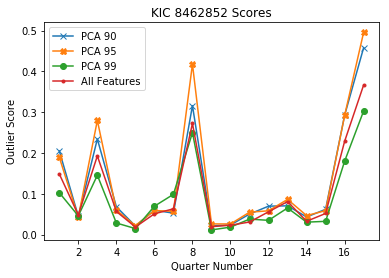

In [219]:
plot_scores(Q_dict, '8462852',Q_dict.keys())
plt.savefig('Figures/Scoring/BoyajianScores.eps')

In [220]:
plt.savefig('Figures/Scoring/BoyajianScores.eps')

<Figure size 432x288 with 0 Axes>

### Looking at previous scores, scaled 0 to 1 w/o a common reference

In [221]:
Q_noref = dict()
for i in range(1,18):
    with open('/home/dgiles/Documents/KeplerLCs/output/Q{}.coo'.format(i),'rb') as file:
        Q_noref['Q{}'.format(i)]=pickle.load(file)

In [222]:
pca90_noref_scores=[]
pca95_noref_scores=[]
pca99_noref_scores=[]
raw_noref_scores=[]

for Q in Q_noref.keys():
    pca90_series = Q_noref[Q].scores['PCA90_sAverage']
    pca95_series = Q_noref[Q].scores['PCA95_sAverage']
    pca99_series = Q_noref[Q].scores['PCA99_sAverage']
    unreduced_series = Q_noref[Q].scores['sAverage']
    frame = {'Unreduced':unreduced_series,
             'PCA90':pca90_series,
             'PCA95':pca95_series,
             'PCA99':pca99_series}
    score_frame = pd.DataFrame(frame)
    
    Q_tabby = tabby_sampler(score_frame)
    pca90_noref_scores.append(Q_tabby.iloc[0,1])
    pca95_noref_scores.append(Q_tabby.iloc[0,2])
    pca99_noref_scores.append(Q_tabby.iloc[0,3])
    raw_noref_scores.append(Q_tabby.iloc[0,0])

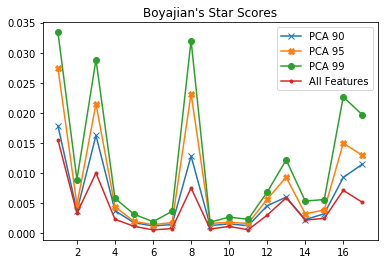

In [223]:
plt.plot(range(1,18),pca90_noref_scores,marker='x',label='PCA 90')
plt.plot(range(1,18),pca95_noref_scores,marker='X',label='PCA 95')
plt.plot(range(1,18),pca99_noref_scores,marker='o',label='PCA 99')
plt.plot(range(1,18),raw_noref_scores,marker='.', label='All Features')
plt.title("Boyajian's Star Scores")
plt.legend()

In [155]:
Q_noref['Q2'].scores.keys()

Index(['4', '5', '6', '7', '8', '9', '10', '11', '12', '13', 'Average', 's4',
       's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 'sAverage',
       'PCA90_4', 'PCA90_5', 'PCA90_6', 'PCA90_7', 'PCA90_8', 'PCA90_9',
       'PCA90_10', 'PCA90_11', 'PCA90_12', 'PCA90_13', 'PCA90_Average',
       'PCA90_s4', 'PCA90_s5', 'PCA90_s6', 'PCA90_s7', 'PCA90_s8', 'PCA90_s9',
       'PCA90_s10', 'PCA90_s11', 'PCA90_s12', 'PCA90_s13', 'PCA90_sAverage',
       'PCA95_4', 'PCA95_5', 'PCA95_6', 'PCA95_7', 'PCA95_8', 'PCA95_9',
       'PCA95_10', 'PCA95_11', 'PCA95_12', 'PCA95_13', 'PCA95_Average',
       'PCA95_s4', 'PCA95_s5', 'PCA95_s6', 'PCA95_s7', 'PCA95_s8', 'PCA95_s9',
       'PCA95_s10', 'PCA95_s11', 'PCA95_s12', 'PCA95_s13', 'PCA95_sAverage',
       'PCA99_4', 'PCA99_5', 'PCA99_6', 'PCA99_7', 'PCA99_8', 'PCA99_9',
       'PCA99_10', 'PCA99_11', 'PCA99_12', 'PCA99_13', 'PCA99_Average',
       'PCA99_s4', 'PCA99_s5', 'PCA99_s6', 'PCA99_s7', 'PCA99_s8', 'PCA99_s9',
       'PCA99_s10',

In [7]:
fts_minus_rats = ['longtermtrend', 'meanmedrat', 'skews', 'varss', 'coeffvar', 'stds',
       'numoutliers', 'numnegoutliers', 'numposoutliers', 'numout1s', 'kurt',
       'mad', 'maxslope', 'minslope', 'meanpslope', 'meannslope', 'g_asymm',
       'rough_g_asymm', 'diff_asymm', 'skewslope', 'varabsslope', 'varslope',
       'meanabsslope', 'absmeansecder', 'num_pspikes', 'num_nspikes',
       'num_psdspikes', 'num_nsdspikes', 'stdratio', 'pstrend', 'num_zcross',
       'num_pm', 'len_nmax', 'len_nmin', 'mautocorrcoef', 'ptpslopes',
       'periodicity', 'periodicityr', 'naiveperiod', 'maxvars', 'maxvarsr',
       'oeratio', 'amp', 'normamp', 'mbp', 'mid20', 'mid35', 'mid50', 'mid65',
       'mid80', 'percentamp', 'magratio', 'sautocorrcoef', 'autocorrcoef',
       'flatmean', 'tflatmean', 'roundmean', 'troundmean']


In [8]:
Q='Q1'
# Use StandardScaler to normalize all features
Q_data_scaled = qt.data_scaler(Q_dict[Q].data.loc[:,fts_minus_rats])
# Score each object by its proximity to its neighbors, use sampling to improve computing time
scores = dist_scores_s(data = Q_data_scaled,samp_size=1000,n_iter=10,k=1)
# Scale the data by the score of the sinusoid (which must be the final index)
scoresdf = pd.DataFrame(data = scores.T/scores[-1], columns=['Unreduced'],index=Q_data_scaled.index)
# Save scores to the cluster outlier object. 
# Note: Not sure why it's rescaled... probably leftover and redundant. Shouldn't hurt anything
# since the score of the sinusoid should be scaled to 1 by all post-score scaling.
Q_dict[Q].scores['minus_rats'] = scoresdf/scoresdf.loc['sinusoid','Unreduced']

In [9]:
qt.plot_top_n(Q_dict['Q1'],sortby='minus_rats')

NameError: name 'Observations' is not defined

In [ ]:
# Starting with full-featured scoring
# Loop through all quarters in Q_dict.
for Q in Q_dict.keys():
    # Use StandardScaler to normalize all features
    Q_data_scaled = qt.data_scaler(Q_dict[Q].data.loc[:,fts_minus_rats])
    # Score each object by its proximity to its neighbors, use sampling to improve computing time
    scores = dist_scores_s(data = Q_data_scaled,samp_size=1000,n_iter=10,k=1)
    # Scale the data by the score of the sinusoid (which must be the final index)
    scoresdf = pd.DataFrame(data = scores.T/scores[-1], columns=['Unreduced'],index=Q_data_scaled.index)
    # Save scores to the cluster outlier object. 
    # Note: Not sure why it's rescaled... probably leftover and redundant. Shouldn't hurt anything
    # since the score of the sinusoid should be scaled to 1 by all post-score scaling.
    Q_dict[Q].scores['minus_rats'] = scoresdf/scoresdf.loc['sinusoid','Unreduced']